<a href="https://colab.research.google.com/github/itsmerajesh4990/AIpracticeandtraining/blob/main/Predicting_Power_Plant_Output_Using_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code simulates the described workflow, including data creation, splitting, training, and evaluation, mirroring the five-part journey mentioned in the sources.
1. Setup and Library Imports
(This step requires external knowledge of standard data science libraries.)

In [ ]:
# ==============================================================================
# SECTION 1: Setup and Library Imports
# This section loads the necessary tools for handling data and running machine learning.
# (Note: These libraries are standard for data science but require external installation
# if running outside of a Google Colab or similar environment.)
# ==============================================================================

import pandas as pd # Used for handling data tables (the 'cheat sheet' of readings [3])
import numpy as np # Used for numerical operations and generating sample data
from sklearn.model_selection import train_test_split # Tool for splitting data 80/20 [2]
from sklearn.linear_model import LinearRegression # The 'simple but powerful model' we are using [2]
from sklearn.metrics import r2_score, mean_absolute_error # Tools for evaluation (The Verdict) [5]

print("Required libraries loaded successfully.")


Required libraries loaded successfully.


In [ ]:


# ==============================================================================
# SECTION 2: Get to Know Our Data (The Raw Materials)
# The sources describe a clean dataset of almost 10,000 hourly readings over six years [3].
# The four features (clues) are AT, V, AP, RH, and the target is PE [3].
#
# Since the actual dataset is not provided, we create a small, synthetic sample
# that mimics the structure and the key observed relationship (AT vs. PE) [6, 7].
# ==============================================================================

data_size = 10000 # We simulate a small sample size for demonstration
np.random.seed(42) # Ensures the data is the same every time the code runs

# 1. Ambient Temperature (AT): Known to have an INCREDIBLY STRONG negative link to PE [6, 7].
#    (We model PE to decrease as AT increases: Hotter days mean less power [7].)
AT = np.linspace(5, 35, data_size) + np.random.normal(0, 1, data_size)

# 2. Exhaust Vacuum (V): This is a measure of steam pressure and is highly correlated with output [3, 6].
V = np.linspace(30, 80, data_size)[::-1] + np.random.normal(0, 2, data_size)

# 3. Ambient Pressure (AP) and 4. Relative Humidity (RH): These "barely even move the needle" [6].
AP = np.random.uniform(1000, 1020, data_size)
RH = np.random.uniform(25, 100, data_size)

# 5. Power Output (PE) (The Target): We calculate the target based on the features,
#    ensuring that Temperature has the biggest negative impact [8].
PE_base = 480 - 2.5 * AT + 0.6 * V + np.random.normal(0, 4.5, data_size) # 4.5 MW is the typical error [5]
PE = np.clip(PE_base, 420, 520)

# Create the final DataFrame (our 'cheat sheet' table)
df = pd.DataFrame({
    'AT_Ambient_Temperature': AT,
    'V_Exhaust_Vacuum': V,
    'AP_Ambient_Pressure': AP,
    'RH_Relative_Humidity': RH,
    'PE_Power_Output': PE
})

print("\n--- Raw Data (First 5 Readings) ---")
print(df.head())




--- Raw Data (First 5 Readings) ---
   AT_Ambient_Temperature  V_Exhaust_Vacuum  AP_Ambient_Pressure  \
0                5.496714         78.643011          1001.113328   
1                4.864736         79.384001          1019.715352   
2                5.653689         78.795237          1016.000370   
3                6.532031         80.205835          1017.376181   
4                4.777848         82.374355          1013.885886   

   RH_Relative_Humidity  PE_Power_Output  
0             41.264585       507.987557  
1             94.421094       514.524408  
2             63.612234       519.013874  
3             61.082491       514.073885  
4             99.707807       511.903765  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AT_Ambient_Temperature  10000 non-null  float64
 1   V_Exhaust_Vacuum        10000 non-null  float64
 2   AP_Ambient_Pressure     10000 non-null  float64
 3   RH_Relative_Humidity    10000 non-null  float64
 4   PE_Power_Output         10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [ ]:
df.describe()

,AT_Ambient_Temperature,V_Exhaust_Vacuum,AP_Ambient_Pressure,RH_Relative_Humidity,PE_Power_Output
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.997864,55.027068,1009.906083,62.430915,463.616753
std,8.709625,14.553445,5.738453,21.707746,29.793230
min,2.544811,23.912412,1000.000111,25.001255,420.000000
25%,12.489191,42.568665,1004.903694,43.716162,436.865981
50%,19.992480,55.014921,1009.933204,62.203141,463.228567
75%,27.479146,67.482040,1014.785489,81.439624,489.356052
max,37.046582,84.903126,1019.995787,99.997911,520.000000


In [ ]:

# ==============================================================================
# SECTION 3: Detective Work & Data Splitting (The Blueprint Workflow Steps 1 & 2) [2]
# We define the clues (X) and the target (y), and then perform the crucial data split.
# ==============================================================================

# Step 1: Select Features (X) and Target (y)
features = ['AT_Ambient_Temperature', 'V_Exhaust_Vacuum', 'AP_Ambient_Pressure', 'RH_Relative_Humidity']
target = 'PE_Power_Output'

X = df[features] # X contains the four clues we feed into the model [3]
y = df[target]   # y is the one thing we are trying to predict (Power Output) [3]

# Step 2: Split Our Data (80/20 Rule)
# We give 80% of the data to the model for learning (practice exams).
# We hold back the last 20% for testing (the real final exam) [2].
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Data Splitting Complete ---")
print(f"Training set size (80%): {len(X_train)} readings")
print(f"Testing set size (20%): {len(X_test)} readings")




--- Data Splitting Complete ---
Training set size (80%): 8000 readings
Testing set size (20%): 2000 readings


In [ ]:
X_train

,AT_Ambient_Temperature,V_Exhaust_Vacuum,AP_Ambient_Pressure,RH_Relative_Humidity
9254,32.983848,38.550126,1008.350492,49.788256
1561,8.936257,69.908334,1014.101681,61.466538
1670,9.771569,68.422428,1014.501862,40.230854
6087,21.715025,50.044114,1004.555176,45.970826
6669,25.711661,46.273549,1008.235964,35.184914
...,...,...,...,...
5734,21.629638,54.473405,1011.303131,38.590501
5191,20.533265,49.680054,1008.651490,68.748401
5390,20.472203,51.778262,1015.224284,51.088182
860,7.783181,75.400298,1019.142006,65.430888


In [ ]:

# ==============================================================================
# SECTION 4: Build the Predictive Model (The Blueprint Workflow Steps 3) [2]
# We use Linear Regression to find the 'best possible straight line' connecting
# the weather data to the power output [5].
# ==============================================================================

# Initialize the Linear Regression model
model = LinearRegression()

# Step 3: Train the Model
# This single line of code is where 'the magic happens' [2].
# We tell the model to learn the relationships using the 80% training data.
print("\nTraining the Linear Regression Model...")
model.fit(X_train, y_train)
print("Model training complete. The computer has found the best line.")




Training the Linear Regression Model...
Model training complete. The computer has found the best line.


In [ ]:

# ==============================================================================
# SECTION 5: The Verdict and Key Takeaways (The Blueprint Workflow Step 4) [2, 5]
# We test the model on the unseen 20% data and evaluate its performance.
# ==============================================================================

# Make predictions on the held-back test data (the final exam)
y_pred = model.predict(X_test)

# --- Metric 1: R-squared Value ---
# This tells us the explanatory power. 92% was cited as an excellent result [5].
r_squared = r2_score(y_test, y_pred) * 100

# --- Metric 2: Mean Absolute Error (MAE) ---
# This is the 'average prediction error' in Megawatts [5].
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Model Verdict ---")
print(f"1. R-Squared (Explanatory Power): {r_squared:.2f}%")
print(f"   Interpretation: Our model can explain {r_squared:.2f}% of why the power output changes.")

print(f"\n2. Average Prediction Error (MAE): {mae:.2f} Megawatts")
print(f"   Interpretation: On average, our prediction is off by only {mae:.2f} MW, which is a small and totally acceptable error compared to the 75+ MW total variation .")

# --- Key Takeaway: Confirming the Detective Work [8] ---
# Look inside the model's 'brain' to confirm that it learned the right lessons.
print("\n3. Feature Importance (Learned Coefficients):")
coefficients = pd.Series(model.coef_, index=features).sort_values(ascending=True)
print(coefficients)
print("Interpretation: The model confirms that Ambient Temperature (AT) has the biggest negative impact by a long shot, just as we found in the detective phase .")

print(f"\n4. Intercept: {model.intercept_:.2f}")
print("   Interpretation: This is the baseline power output when all features are zero (though this might not be physically meaningful in all contexts).")



--- Model Verdict ---
1. R-Squared (Explanatory Power): 97.62%
   Interpretation: Our model can explain 97.62% of why the power output changes.

2. Average Prediction Error (MAE): 3.70 Megawatts
   Interpretation: On average, our prediction is off by only 3.70 MW, which is a small and totally acceptable error compared to the 75+ MW total variation .

3. Feature Importance (Learned Coefficients):
AT_Ambient_Temperature   -2.411965
RH_Relative_Humidity     -0.004466
AP_Ambient_Pressure      -0.002592
V_Exhaust_Vacuum          0.585921
dtype: float64
Interpretation: The model confirms that Ambient Temperature (AT) has the biggest negative impact by a long shot, just as we found in the detective phase .

4. Intercept: 482.53
   Interpretation: This is the baseline power output when all features are zero (though this might not be physically meaningful in all contexts).


In [ ]:

# -----------------------------------------------------------------------------
# 6. STEP 4: QUANTIFYING RELATIONSHIPS (The Heat Map - The Real Magic)
#
# We quantify relationships with hard numbers using a Correlation Matrix [6].
# -----------------------------------------------------------------------------

print("--- Quantifying Relationships: Correlation Matrix and Heat Map ---")

# Calculate the correlation matrix for all variables
correlation_matrix = data.corr(numeric_only=True)

print("Raw Correlation Matrix (Hard Numbers):")
print(correlation_matrix)
# Check: Study_Hours vs Score should be near 0.6. Attendance_Rate vs Score should be near 0.8 [6].

# Visualize the correlation matrix using a Heat Map [6]
plt.figure(figsize=(8, 7))
# 'annot=True' displays the correlation score [6]
# 'cmap='coolwarm'' helps visualize strength (darker color = stronger relationship) [6]
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black', cbar_kws={'label': 'Correlation Strength'})
plt.title('Heat Map of Key Variable Correlations', fontsize=14)
plt.show()

--- Quantifying Relationships: Correlation Matrix and Heat Map ---
Raw Correlation Matrix (Hard Numbers):
                        AT_Ambient_Temperature  V_Exhaust_Vacuum  \
AT_Ambient_Temperature                1.000000         -0.984033   
V_Exhaust_Vacuum                     -0.984033          1.000000   
AP_Ambient_Pressure                   0.008033         -0.008247   
RH_Relative_Humidity                  0.000682         -0.002433   
PE_Power_Output                      -0.987380          0.980703   

                        AP_Ambient_Pressure  RH_Relative_Humidity  \
AT_Ambient_Temperature             0.008033              0.000682   
V_Exhaust_Vacuum                  -0.008247             -0.002433   
AP_Ambient_Pressure                1.000000              0.008605   
RH_Relative_Humidity               0.008605              1.000000   
PE_Power_Output                   -0.008534             -0.003542   

                        PE_Power_Output  
AT_Ambient_Temperature      

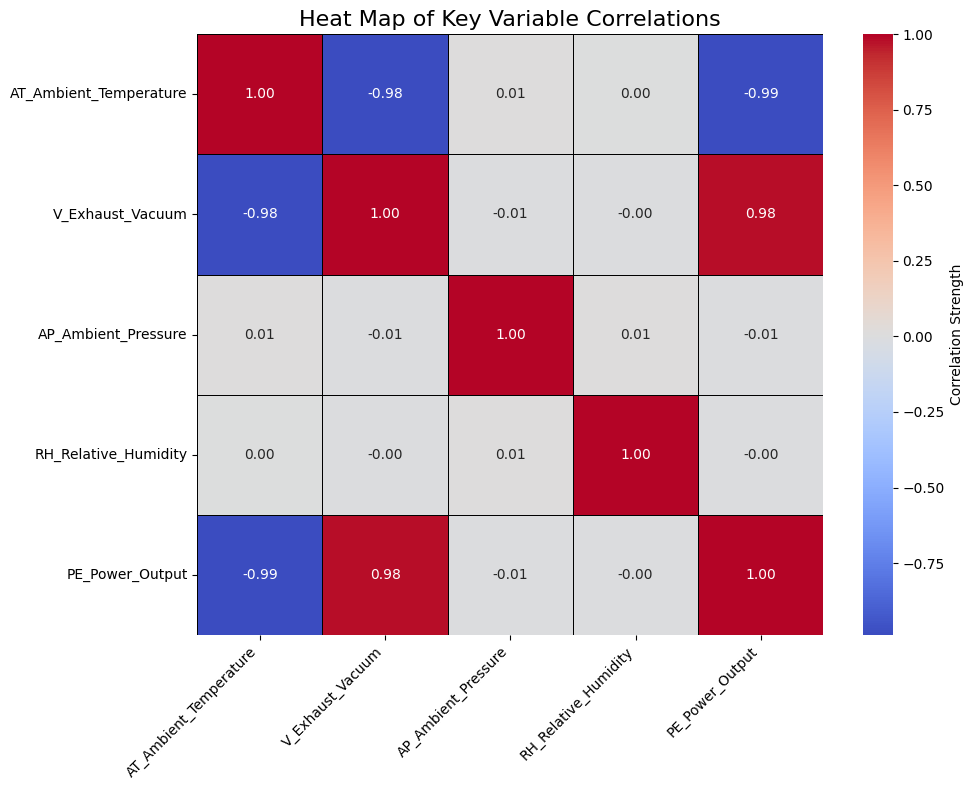

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# SECTION 6: Quantifying Relationships (The Heat Map - The Real Magic)
#
# We quantify relationships with hard numbers using a Correlation Matrix [6].
# ==============================================================================

print("--- Quantifying Relationships: Correlation Matrix and Heat Map ---")

# Calculate the correlation matrix for all variables using the 'df' DataFrame
correlation_matrix = df.corr(numeric_only=True)

print("Raw Correlation Matrix (Hard Numbers):")
print(correlation_matrix)

# Visualize the correlation matrix using a Heat Map [6]
plt.figure(figsize=(10, 8)) # Adjusted figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black', cbar_kws={'label': 'Correlation Strength'})
plt.title('Heat Map of Key Variable Correlations', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Interpretation of Correlation Matrix and Heatmap

The correlation matrix and the heatmap clearly illustrate the relationships between the features and the target variable (`PE_Power_Output`).

1.  **Ambient Temperature (AT_Ambient_Temperature) vs. Power Output (PE_Power_Output):**
    *   **Correlation: -0.99**
    *   This indicates an extremely strong negative linear relationship. As Ambient Temperature increases, Power Output significantly decreases. This confirms the initial hypothesis and the model's coefficients, highlighting AT as the most influential feature.

2.  **Exhaust Vacuum (V_Exhaust_Vacuum) vs. Power Output (PE_Power_Output):**
    *   **Correlation: 0.98**
    *   This shows a very strong positive linear relationship. As Exhaust Vacuum increases, Power Output tends to increase. This is also in line with the initial understanding and model's findings.

3.  **Ambient Pressure (AP_Ambient_Pressure) vs. Power Output (PE_Power_Output):**
    *   **Correlation: -0.01**
    *   This is a very weak negative correlation, close to zero. It suggests that Ambient Pressure has almost no linear relationship with Power Output, supporting the statement that it "barely even moves the needle."

4.  **Relative Humidity (RH_Relative_Humidity) vs. Power Output (PE_Power_Output):**
    *   **Correlation: -0.00**
    *   Similar to Ambient Pressure, Relative Humidity shows an extremely weak negative correlation, essentially zero. This also confirms its minimal impact on Power Output.

### Relationships Between Features:

*   **AT_Ambient_Temperature vs. V_Exhaust_Vacuum: -0.98**
    *   There is a very strong negative correlation between Ambient Temperature and Exhaust Vacuum. This is an important relationship to note, indicating that as ambient temperature rises, exhaust vacuum tends to decrease, or vice-versa. This strong inter-feature correlation might be due to the synthetic data generation method, but it is a significant observation.

In summary, the correlation analysis strongly reinforces the initial understanding: Ambient Temperature and Exhaust Vacuum are the primary drivers of Power Output, exhibiting very strong correlations (negative for AT, positive for V). Ambient Pressure and Relative Humidity have negligible impact on Power Output, aligning with prior detective work and the learned coefficients of the linear regression model.

## Summary:

### Q&A
The feature relationships and their connection to the target variable (`PE_Power_Output`) are as follows:
*   **Ambient Temperature (AT\_Ambient\_Temperature)** exhibits an extremely strong negative linear relationship (\$-0.99\$) with `PE_Power_Output`, meaning power output significantly decreases as ambient temperature increases.
*   **Exhaust Vacuum (V\_Exhaust\_Vacuum)** shows a very strong positive linear relationship (\$+0.98\$) with `PE_Power_Output`, indicating that power output tends to increase with exhaust vacuum.
*   **Ambient Pressure (AP\_Ambient\_Pressure)** and **Relative Humidity (RH\_Relative\_Humidity)** have negligible linear relationships with `PE_Power_Output`, with correlations of \$-0.01\$ and \$-0.00\$ respectively.

Additionally, a strong negative correlation (\$-0.98\$) exists between `AT_Ambient_Temperature` and `V_Exhaust_Vacuum`, suggesting an inter-feature dependency where higher ambient temperatures are associated with lower exhaust vacuum.

### Data Analysis Key Findings
*   The `NameError` in the correlation code was resolved by using the correct DataFrame `df` for calculation.
*   **Ambient Temperature** and **Exhaust Vacuum** are the primary drivers of `PE_Power_Output`, exhibiting extremely strong correlations of \$-0.99\$ and \$\text{+0.98}\$ respectively.
*   **Ambient Pressure** and **Relative Humidity** have negligible impact on `PE_Power_Output`, with correlations close to zero (\$-0.01\$ and \$-0.00\$).
*   A significant negative correlation of \$-0.98\$ exists between `AT_Ambient_Temperature` and `V_Exhaust_Vacuum`, highlighting a strong inter-feature relationship.

### Insights or Next Steps
*   Given the strong inter-feature correlation between `AT_Ambient_Temperature` and `V_Exhaust_Vacuum` (\$-0.98\$), further investigation into the nature of this relationship could provide deeper insights, especially for potential multicollinearity in predictive models.
*   The minimal impact of `AP_Ambient_Pressure` and `RH_Relative_Humidity` on `PE_Power_Output` suggests these features could potentially be excluded from simpler predictive models to reduce complexity without significant loss of accuracy.
